In [9]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

img = cv2.imread('im2.jpeg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'+) | EMI RLS ca}\nDre CRS OU ite\nmit frischen Gemilse und Krautern\n\n| rz: |I]\neRe uel\nMUS Ue i con LG CL CLo\n\nRWS LV LT\nAer er ies eh\n\n7 ee 1 3 2,90\nGedampfte unrelf geerntete Sojabohnen\n\n6. BUN BO NAM BO CHAY™ Pa\nHerzhafte vegetarische Reisnudelsalat\nmit gebr: Soja-Weizen Rinderimitat,\nfrischem Gemise und Krautern\n\na eI\nHausgemachtes Nudelgericht\nTMA SNR RO\n\nXM LN I\nVegetarische Curry-Eintopf\nmit frischem Gemise und Krautern\n\nMeg VY ASI)\nGebratene Bandnudein\nUMS RLU CL sk ce UCL\n\nURS CULL I\nye) Bu rca e ULeL\nMee a EMG AU ome UU\n\nee eI\nSER cine ee eae\nin Kokosmilchsauce und Gemise, dazu Jasminreis\n\x0c'

In [15]:
import cv2
import numpy as np

img = cv2.imread('im2.jpeg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [11]:
image = cv2.imread('im2.jpeg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

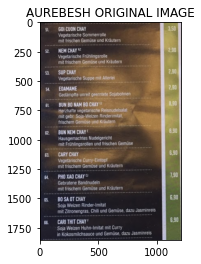

In [12]:
# Plot original image

image = cv2.imread('im2.jpeg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [16]:

# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
open_ = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': open_, 
          'canny': canny}

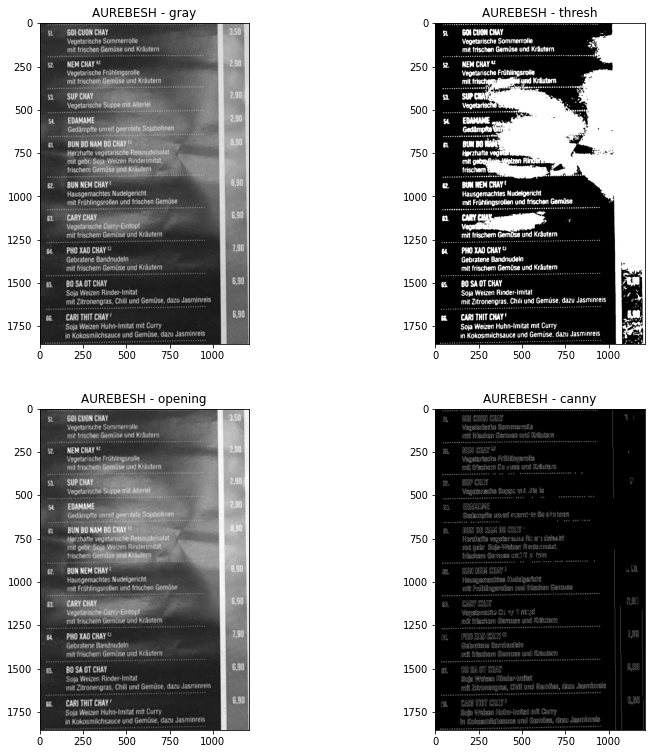

In [17]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [22]:

# Get OCR output using Pytesseract

custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Pe CLG ET
Dre CRS OU ite
mit frischen Gemiise Und Krautern

sz) NEMCHAY* 2,90
eRe uel
MUS Ue i con LG CL CLo

Ss) PAI]
Aer er ies eh

7 ee 1 3 2,90
Gedampfte unreif geerntete Sojabohnen

s) BUN BO NAM BO CHAY™ Pa
Herzhafte vegetarische Reisnudelsalat
RR ater) ee Pc
frischem Gemise und Krautern

a AI
Hausgemachtes| Nudelgericht
mit Frithlingsrollen und frischen Gemise

XM LN I
Vegetarische Curry-Eintop!
mit frischem GemUse und Krautern

s  PHOKAD CHAY™ hi
Gebratene Bandnudein
UMS RLU CL sk ce UCL

ORS LLY hl
ye) Bu rca e ULeL
Mee a EMG AU ome UU

ee eI
Ry oc ee aL
in Kokosmilchsauce und Gemise) dazu Vasminreis


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Pe CLG ET
Dre CRS OU ite
mit frischen Gemiise Und Krautern

sz) NEMCHAY* 2,90
eRe uel
MUS Ue i con LG CL CLo

Ss) PAI]
Aer er ies eh

7 e

In [19]:
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


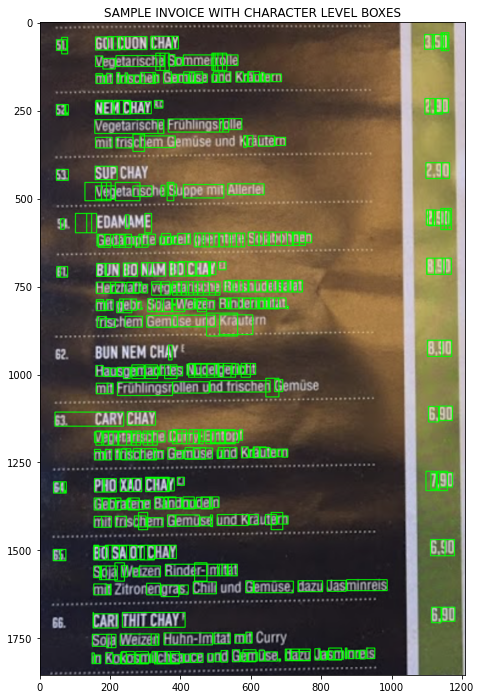

In [20]:
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


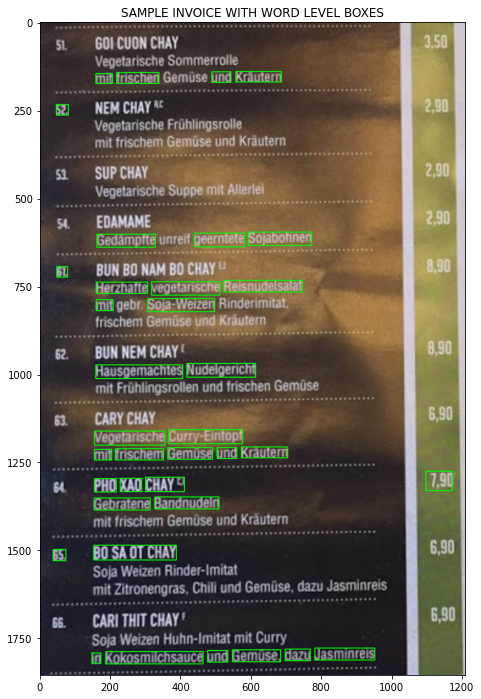

In [21]:
image = cv2.imread('im2.jpeg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()